In [6]:
# get the data from the file
import pandas as pd
full_data = pd.read_csv('../stats_full_2504_full.csv')
full_data.head()

,datetime,precipRate,pressureMax,dewptAvg,windgustHigh,windspeedAvg,tempAve,humidityAvg,winddirAvg,uvHigh,solarRadiationHigh,BirdNET,MIT_AST_label,sound_class_label
0,2024-03-03 08:34:48,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,NaN,Bird,bird
1,2024-03-03 08:34:50,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Owl,bird
2,2024-03-03 08:34:53,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Owl,bird
3,2024-03-03 08:34:56,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Bird,bird
4,2024-03-03 08:34:59,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,NaN,Bird,bird


In [7]:
full_data.shape

(404553, 14)

Understanding Column Suffixis. Through experimenting.

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df =full_data[['precipRate', 'pressureMax', 'dewptAvg', 'windgustHigh', 'windspeedAvg',
       'tempAve', 'humidityAvg', 'winddirAvg', 'uvHigh', 'solarRadiationHigh']]

# assuming 'datetime' is the index

# Sample a random day
random_day = df.sample(n=1).index.date[0]

# Filter the DataFrame to only this day
day_data = df[df.index.date == random_day]

# If you need to narrow down to a specific hour and minute (less common):
# You can sample random hour and minute based on available data in the randomly selected day
random_hour = np.random.choice(day_data.index.hour)
random_minute = np.random.choice(day_data[day_data.index.hour == random_hour].index.minute)

# Filter to the specific hour and minute
hour_minute_data = day_data[(day_data.index.hour == random_hour) & (day_data.index.minute == random_minute)]

# Sample 10 entries from this filtered data
samples = hour_minute_data.sample(n=10) if len(hour_minute_data) >= 10 else hour_minute_data

# Print the sampled data
print(samples)

# If you just want to see variations within a day:
# Sample 10 random entries from the day's data
day_samples = day_data.sample(n=10, replace=True)  # Use replace=True if less than 10 entries exist

# Print the sampled data
print(day_samples)

                     precipRate  pressureMax  dewptAvg  windgustHigh  \
datetime                                                               
2024-03-17 09:26:01         0.0      1016.32       6.6           5.5   
2024-03-17 09:26:08         0.0      1016.32       6.6           5.5   
2024-03-17 09:26:13         0.0      1016.32       6.6           5.5   
2024-03-17 09:26:38         0.0      1016.32       6.6           5.5   
2024-03-17 09:26:41         0.0      1016.32       6.6           5.5   
2024-03-17 09:26:43         0.0      1016.32       6.6           5.5   
2024-03-17 09:26:48         0.0      1016.32       6.6           5.5   
2024-03-17 09:26:50         0.0      1016.32       6.6           5.5   
2024-03-17 09:26:53         0.0      1016.32       6.6           5.5   

                     windspeedAvg  tempAve  humidityAvg  winddirAvg  uvHigh  \
datetime                                                                      
2024-03-17 09:26:01           0.8      9.2       

Understanding Column Suffixes

Ave (Average): These values represent the average measurement within a given minute. This is typically used for variables where a single snapshot might not fully capture the variability within the minute, like temperature (tempAve) or humidity (humidityAvg).

Max (Maximum): This indicates the highest value that a variable reached within that minute. For pressure (pressureMax), this could indicate moments of sudden atmospheric pressure changes which are crucial for understanding weather patterns.

High: Similar to "Max", but specifically used in your dataset for variables like wind gusts (windgustHigh) and solar radiation (solarRadiationHigh). This measures the peak or highest intensity reached during the minute, which is particularly relevant for transient or quickly changing conditions.

Did not check possibility of 2 min or 30 min aggregation rules. Possible, but not highly probable options.

In [155]:
#  get  # of unique values in every columm
unique_values = full_data.nunique()
print(unique_values)


precipRate              36
pressureMax            551
dewptAvg               327
windgustHigh            25
windspeedAvg           150
tempAve                390
humidityAvg            554
winddirAvg             335
uvHigh                  11
solarRadiationHigh    1463
BirdNET                105
MIT_AST_label          280
sound_class_label       17
Bird_Detections          2
date                   132
dtype: int64


In [4]:
# rows where BirdNET column is not NaN
birdnet_labeled = full_data[full_data['BirdNET'].notna()]
birdnet_labeled.shape

(71530, 14)

In [5]:
full_data['sound_class_label'].value_counts()

sound_class_label
weather         114717
bird             87898
foley            57745
animal           29456
vehicle          27469
human            25161
door             15984
explosion         5169
background        4561
alarm             4138
mechanical        3611
music             2904
material          2621
vocalization      2422
machine           1931
work              1902
insect             300
Name: count, dtype: int64

Here Confusion matrix is constructed to see where used models agree and disagree in classification.

BirdNET labels are treated as True labels, MIT_AST sound_class_labels['bird'] class as Predictions.


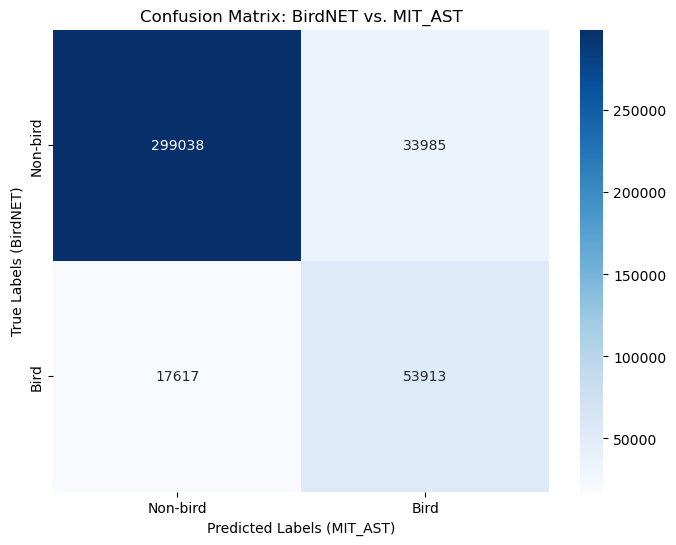

[[299038  33985]
 [ 17617  53913]]


In [8]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'full_data' is your DataFrame
birdnet_notna = full_data['BirdNET'].notna()
sound_class_bird = full_data['sound_class_label'] == 'bird'

# Generating the Confusion Matrix
true_labels = birdnet_notna
predicted_labels = sound_class_bird

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, xticklabels=['Non-bird', 'Bird'], yticklabels=['Non-bird', 'Bird'])
ax.set_xlabel('Predicted Labels (MIT_AST)')
ax.set_ylabel('True Labels (BirdNET)')
ax.set_title('Confusion Matrix: BirdNET vs. MIT_AST')
plt.show()

print(cm)

# Get the DataFrame of True Positives (TP)
TP_df = full_data[birdnet_notna & sound_class_bird]

# Get the DataFrame of False Negatives (FN)
FN_df = full_data[birdnet_notna & ~sound_class_bird]





In [12]:
# Display the first few rows of each DataFrame
TP_df.head() 

,datetime,precipRate,pressureMax,dewptAvg,windgustHigh,windspeedAvg,tempAve,humidityAvg,winddirAvg,uvHigh,solarRadiationHigh,BirdNET,MIT_AST_label,sound_class_label
1,2024-03-03 08:34:50,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Owl,bird
2,2024-03-03 08:34:53,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Owl,bird
3,2024-03-03 08:34:56,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Bird,bird
5,2024-03-03 08:35:02,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Hoot,bird
7,2024-03-03 08:35:08,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Hoot,bird


In [9]:
TP_df.describe()

,precipRate,pressureMax,dewptAvg,windgustHigh,windspeedAvg,tempAve,humidityAvg,winddirAvg,uvHigh,solarRadiationHigh
count,53913.000000,53913.000000,53913.000000,53913.000000,53913.000000,53913.000000,53913.000000,53913.000000,53913.000000,53913.000000
mean,0.094926,1012.037398,8.380522,8.296418,2.609039,11.063402,84.765439,184.553929,0.706026,107.840638
std,0.500158,10.581058,5.036205,5.854608,2.186390,5.905193,12.384054,38.979127,1.221498,131.974086
min,0.000000,980.830000,-9.900000,0.000000,0.000000,-6.500000,41.200000,4.000000,0.000000,0.000000
25%,0.000000,1007.210000,5.800000,3.500000,0.800000,7.700000,76.000000,158.000000,0.000000,13.800000
50%,0.000000,1013.240000,8.400000,7.200000,2.200000,10.500000,87.500000,188.000000,0.000000,57.600000
75%,0.000000,1019.340000,10.700000,11.100000,3.900000,13.700000,95.300000,207.000000,1.000000,151.000000
max,15.010000,1033.320000,22.800000,43.900000,15.100000,32.400000,99.000000,353.000000,9.000000,1155.600000


Let's see the common disagreements betweeen models. 

FN_df represents detections by BirdNET which were classified as non-'bird' class by MIT_AST model. We can see most common confusion labels.


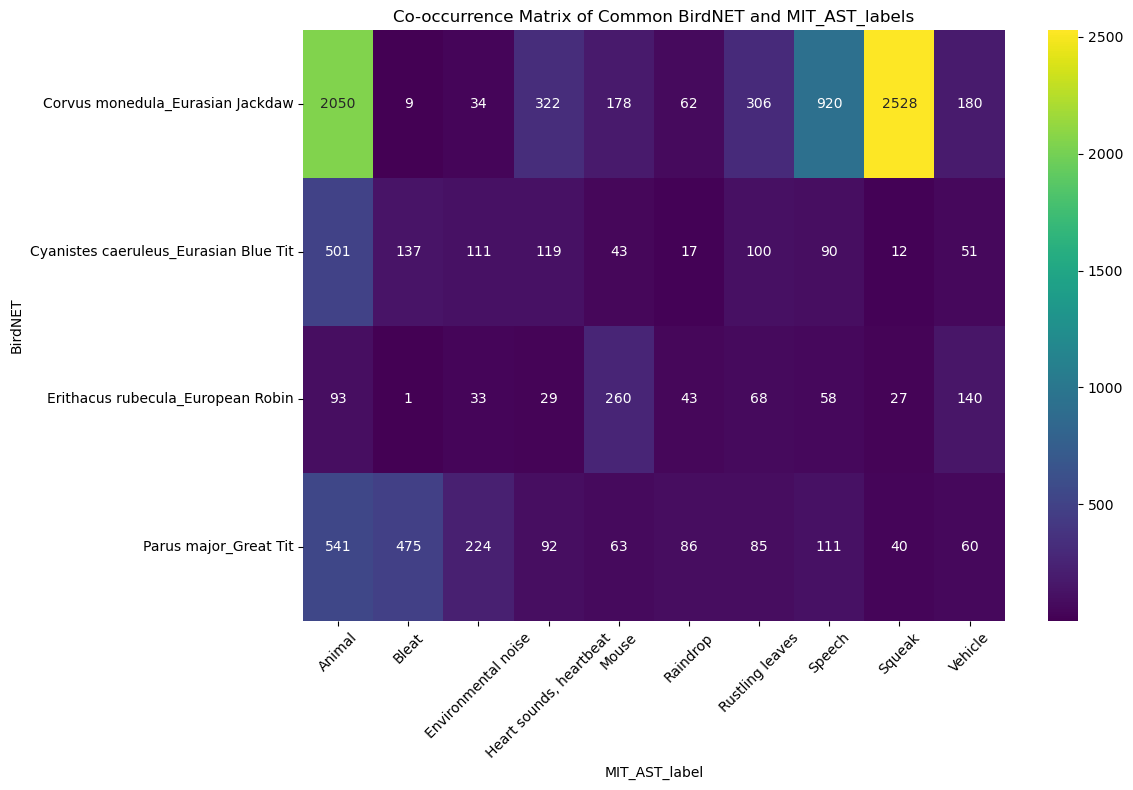

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming FN_df is your DataFrame

# Get the most common 4 'BirdNET' labels
birdnet_labels = FN_df['BirdNET'].value_counts().head(4).index.tolist()

# Get the most common 10 'MIT_AST_label' labels
ast_labels = FN_df['MIT_AST_label'].value_counts().head(10).index.tolist()

# Filter the DataFrame for rows that have the most common labels
filtered_df = FN_df[FN_df['BirdNET'].isin(birdnet_labels) & FN_df['MIT_AST_label'].isin(ast_labels)]

# Create a crosstab matrix of the occurrences of each label in both columns
cooccurrence_matrix = pd.crosstab(filtered_df['BirdNET'], filtered_df['MIT_AST_label'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cooccurrence_matrix, annot=True, fmt='d', cmap='viridis')

# Customizing the plot
plt.title('Co-occurrence Matrix of Common BirdNET and MIT_AST_labels')
plt.xlabel('MIT_AST_label')
plt.ylabel('BirdNET')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



Identify the correct 'datetime' column in the DataFrame.

Convert this column to datetime format.

Set this column as the index.

Resample the DataFrame to aggregate counts per minute.

In [27]:


# Ensure the 'datetime' column is in datetime format
TP_df['datetime'] = pd.to_datetime(TP_df['datetime'])

# Set the 'datetime' column as the index
TP_df.set_index('datetime', inplace=True)

# Resample to aggregate counts per minute
TP_df_resampled_per_minute = TP_df.resample('min').count()


# Display the first few rows of the resampled DataFrame
TP_df_resampled_per_minute.head()


/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_74866/2154710588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TP_df['datetime'] = pd.to_datetime(TP_df['datetime'])


,precipRate,pressureMax,dewptAvg,windgustHigh,windspeedAvg,tempAve,humidityAvg,winddirAvg,uvHigh,solarRadiationHigh,BirdNET,MIT_AST_label,sound_class_label
datetime,,,,,,,,,,,,,
2023-08-11 17:59:00,3,3,3,3,3,3,3,3,3,3,3,3,3
2023-08-11 18:00:00,3,3,3,3,3,3,3,3,3,3,3,3,3
2023-08-11 18:01:00,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-08-11 18:02:00,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-08-11 18:03:00,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
TP_df_resampled_per_minute.shape


(323275, 13)

In [29]:

# Group by time of day and count detections
bird_detections_by_minute = TP_df_resampled_per_minute.groupby(TP_df_resampled_per_minute.index.time).sum()
bird_detections_by_minute.head()

,precipRate,pressureMax,dewptAvg,windgustHigh,windspeedAvg,tempAve,humidityAvg,winddirAvg,uvHigh,solarRadiationHigh,BirdNET,MIT_AST_label,sound_class_label
00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0
00:01:00,0,0,0,0,0,0,0,0,0,0,0,0,0
00:02:00,1,1,1,1,1,1,1,1,1,1,1,1,1
00:03:00,0,0,0,0,0,0,0,0,0,0,0,0,0
00:04:00,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
# Assuming TP_df_resampled_per_minute is your resampled DataFrame
# Group by time of day and sum detections
bird_detections_by_minute = TP_df_resampled_per_minute.groupby(TP_df_resampled_per_minute.index.time).sum()

# Create a Series from the 'BirdNET_Processed' column with the time as the index
detections_series = pd.Series(bird_detections_by_minute['BirdNET'].values, index=bird_detections_by_minute.index)

# Convert the time to minutes since midnight to plot as numeric x-axis
minutes_since_midnight = detections_series.index.map(lambda t: t.hour * 60 + t.minute)


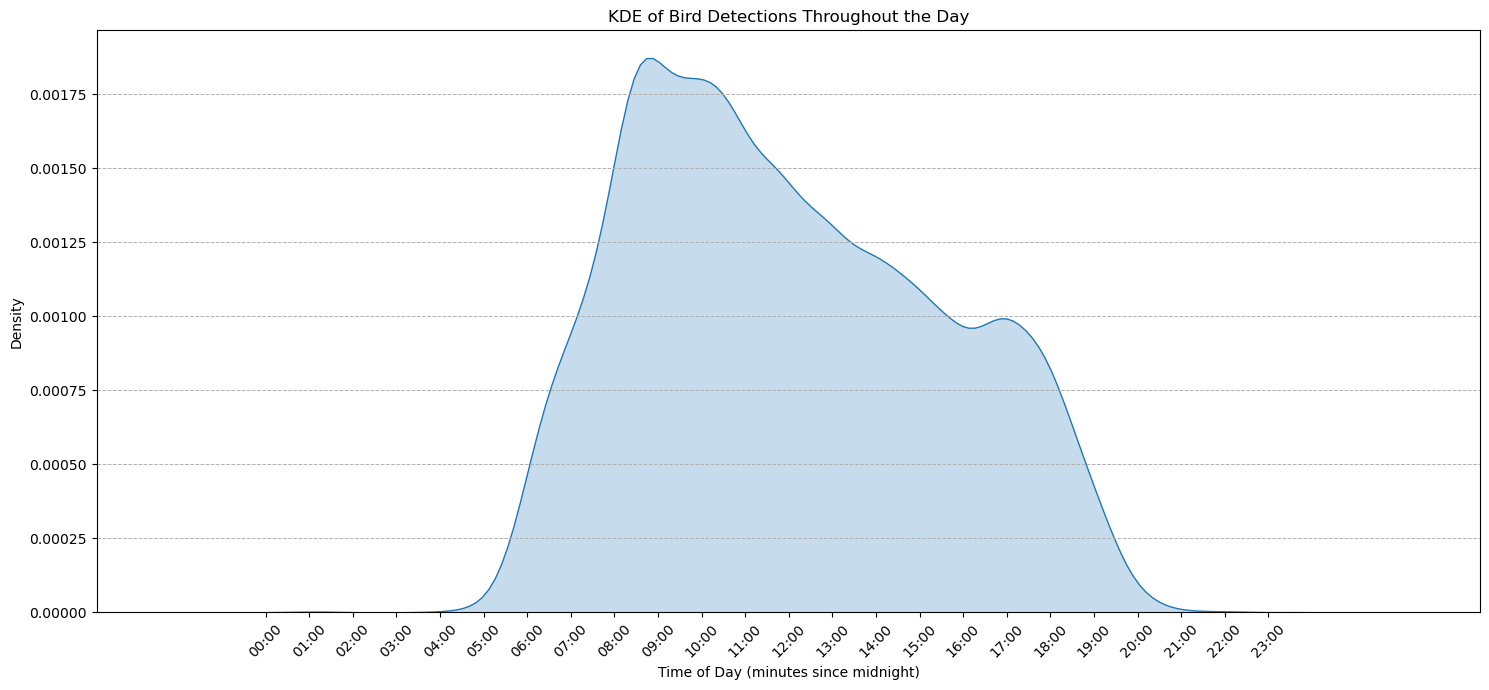

In [32]:
# Create a DataFrame for seaborn
kde_data = pd.DataFrame({
    'Time': minutes_since_midnight,
    'Detections': detections_series.values
})

# Create KDE plot
plt.figure(figsize=(15, 7))
sns.kdeplot(
    data=kde_data,
    x='Time',
    weights='Detections',
    bw_adjust=0.5,
    fill=True
)

# Customizing the plot
plt.title('KDE of Bird Detections Throughout the Day')
plt.xlabel('Time of Day (minutes since midnight)')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Convert the x-ticks back to time format
time_ticks = range(0, 24 * 60, 60)  # Every hour
time_labels = [f'{t//60:02d}:{t%60:02d}' for t in time_ticks]
plt.xticks(time_ticks, time_labels, rotation=45)

plt.tight_layout()
plt.show()

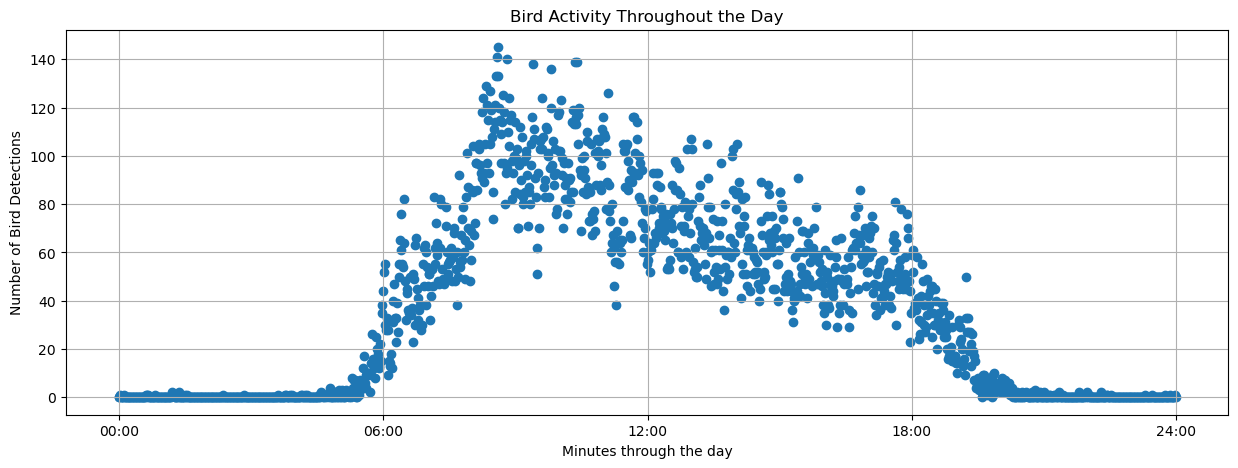

In [34]:
plt.figure(figsize=(15, 5))
plt.scatter(minutes_since_midnight, bird_detections_by_minute['BirdNET'])
plt.xticks([0, 360, 720, 1080, 1440], ['00:00', '06:00', '12:00', '18:00', '24:00'])
plt.title('Bird Activity Throughout the Day')
plt.xlabel('Minutes through the day')
plt.ylabel('Number of Bird Detections')
plt.grid(True)
plt.show()


In [40]:
# make a def to get bird activity per minute throughout the day for a given dataframe
def plot_bird_activity_per_minute(df):
    # Resample to aggregate counts per minute
    df_resampled_per_minute = df.resample('min').count()
    # Group by time of day and count detections
    detections_by_minute = df_resampled_per_minute.groupby(df_resampled_per_minute.index.time).sum()
    # Convert time objects to minutes past midnight
    minutes_past_midnight = [(t.hour * 60 + t.minute) for t in detections_by_minute.index]
    plt.figure(figsize=(15, 5))
    plt.scatter(minutes_past_midnight, detections_by_minute['BirdNET'], marker='o', linestyle='-')
    plt.xticks(range(0, 1441, 60), ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '24:00'])
    plt.title('Bird Activity Throughout the Day')
    plt.xlabel('Minutes Past Midnight')
    plt.ylabel('Number of Bird Detections')
    plt.grid(True)
    plt.show()



In [1]:
TP_df.describe()

NameError: name 'TP_df' is not defined

In [36]:
# Sort the DataFrame by its index (DatetimeIndex) if not already sorted
TP_df = TP_df.sort_index()
# Verify the index is now monotonic increasing
print(TP_df.index.is_monotonic_increasing)



True


In [37]:
september =TP_df.loc['2023-08-30 00:00:00':'2023-09-30 23:59:59']
september.shape

(5940, 13)

In [38]:
december = TP_df.loc['2023-11-30 00:00:00':'2023-12-31 23:59:59']
december.shape

(3733, 13)

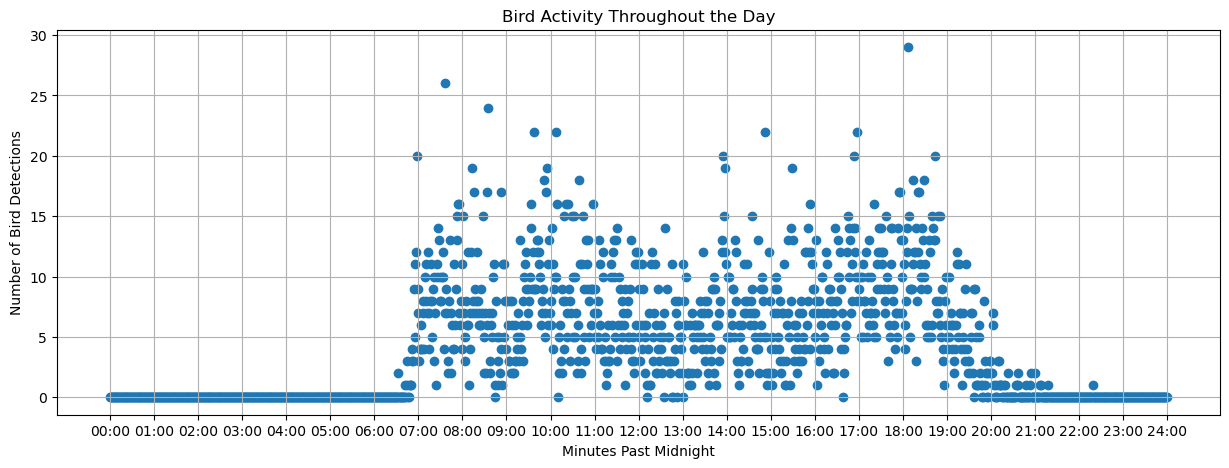

In [41]:
# bird activity over a week in september
plot_bird_activity_per_minute(september)


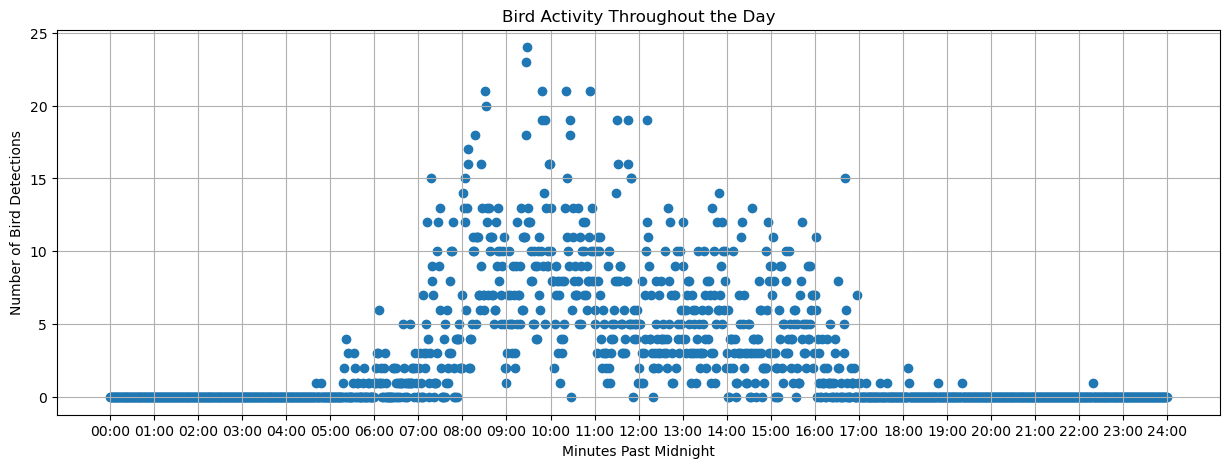

In [42]:
plot_bird_activity_per_minute(december)

In [43]:
march = TP_df.loc['2024-03-01 00:00:00':'2024-03-31 23:59:59']
march.shape

(21870, 13)

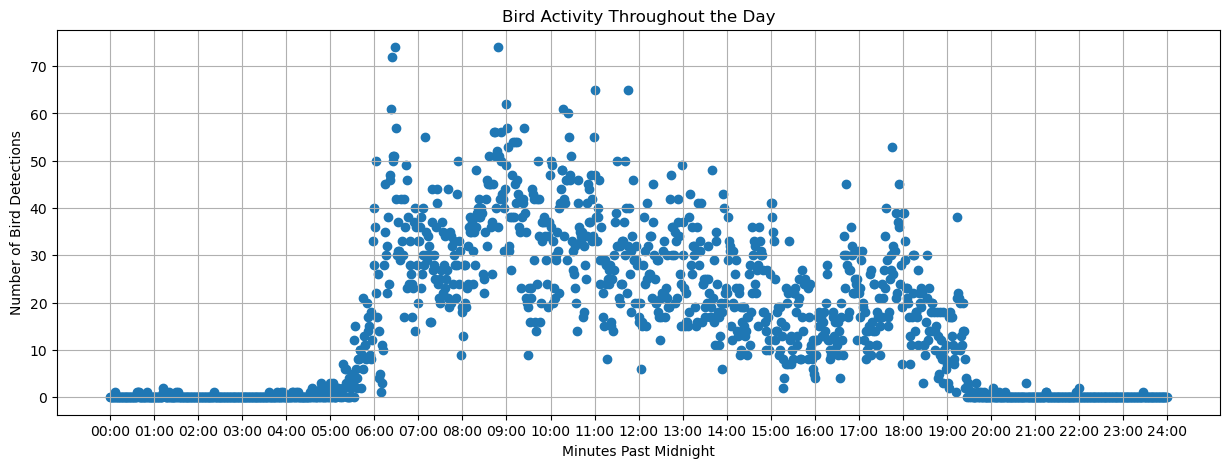

In [44]:
plot_bird_activity_per_minute(march)

In [47]:
# get the list of all unique labels in the 'BirdNET' column and count the number of each label
birdnet_labels = full_data['BirdNET'].value_counts()
most_common_birds = birdnet_labels.head(4).index.to_list()
most_common_birds


['Corvus monedula_Eurasian Jackdaw',
 'Parus major_Great Tit',
 'Cyanistes caeruleus_Eurasian Blue Tit',
 'Streptopelia decaocto_Eurasian Collared-Dove']

/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_74866/59236028.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  bird_df_resampled_per_hour = bird_df.resample('H').count()
/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_74866/59236028.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  bird_df_resampled_per_hour = bird_df.resample('H').count()
/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_74866/59236028.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  bird_df_resampled_per_hour = bird_df.resample('H').count()


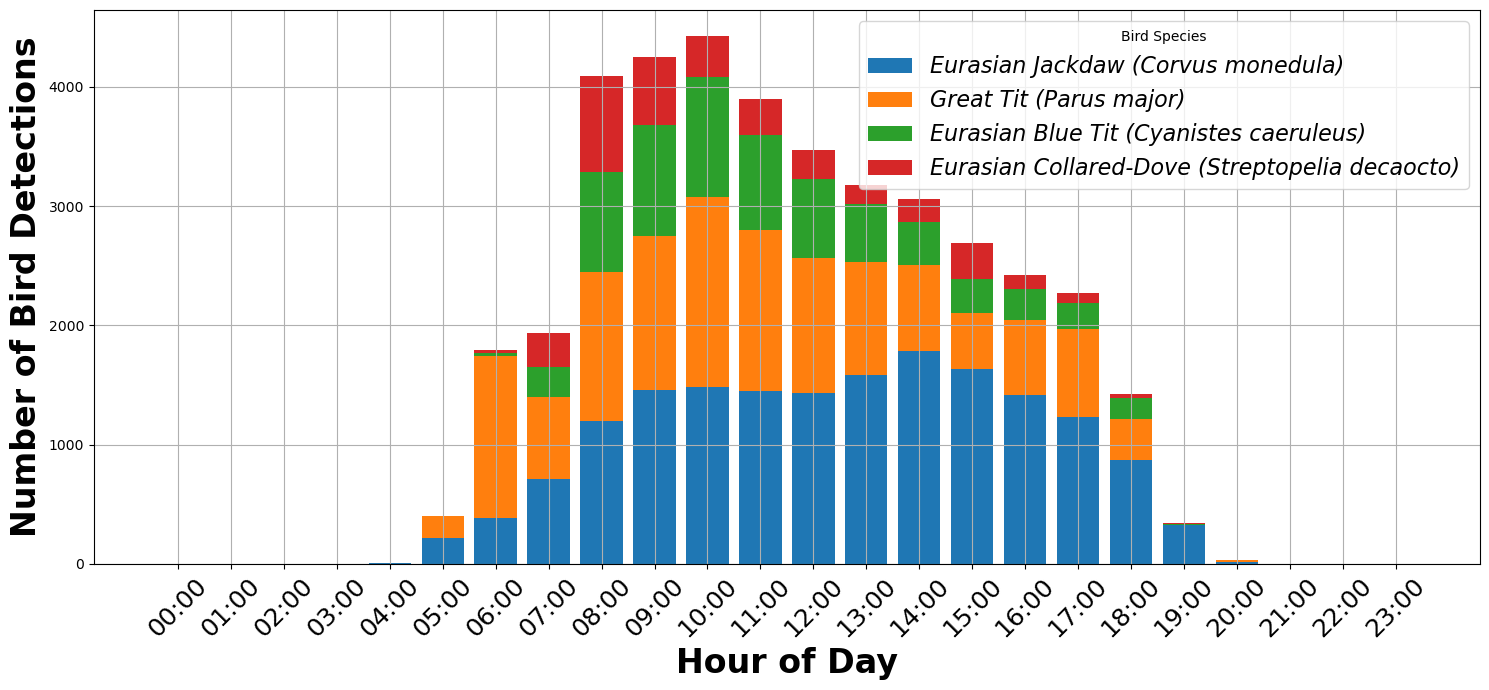

In [49]:
import matplotlib.pyplot as plt

def plot_bird_activity_per_hour_stacked(df, bird_names):
    plt.figure(figsize=(15, 7))
    
    # Initialize a dictionary to hold the resampled data for each bird
    bird_data_per_hour = {}
    
    # The bottom of the stack starts at 0
    stack_bottom = None
    
    # Custom labels for the legend
    custom_labels = []
    
    for bird in bird_names:
        # Filter for the current bird
        bird_df = df[df['BirdNET'] == bird]
        
        # Resample to aggregate counts per hour
        bird_df_resampled_per_hour = bird_df.resample('H').count()
        
        # Group by hour and count detections
        detections_by_hour = bird_df_resampled_per_hour.groupby(bird_df_resampled_per_hour.index.hour).sum()
        
        bird_data_per_hour[bird] = detections_by_hour['BirdNET']
        
        # Plot the activity as stacked bars for each bird
        plt.bar(range(24), bird_data_per_hour[bird], bottom=stack_bottom, label=bird)
        
        # Update the stack_bottom
        if stack_bottom is None:
            stack_bottom = bird_data_per_hour[bird]
        else:
            stack_bottom += bird_data_per_hour[bird]
        
        # Prepare custom labels with common names and scientific names
        common_name, scientific_name = bird.split('_')
        custom_label = f"{scientific_name} ({common_name})"
        custom_labels.append(custom_label)
    
    # Customize the plot
    plt.xticks(range(24), [f'{hour:02d}:00' for hour in range(24)], rotation=45, fontsize=18)
    plt.xlabel('Hour of Day', fontsize=24, fontweight='bold')
    plt.ylabel('Number of Bird Detections', fontsize=24, fontweight='bold')
    
    # Create the legend with custom labels
    plt.legend(custom_labels, title='Bird Species', loc='upper right', prop={'size': 16, 'style': 'italic'})
    
    plt.grid(True)
    plt.tight_layout()
    # Removing the title
    # plt.title('Bird Activity Throughout the Day')
    plt.show()

# Replace 'df' with your actual DataFrame variable name and 'bird_names' with your actual bird species names.
plot_bird_activity_per_hour_stacked(TP_df, most_common_birds)


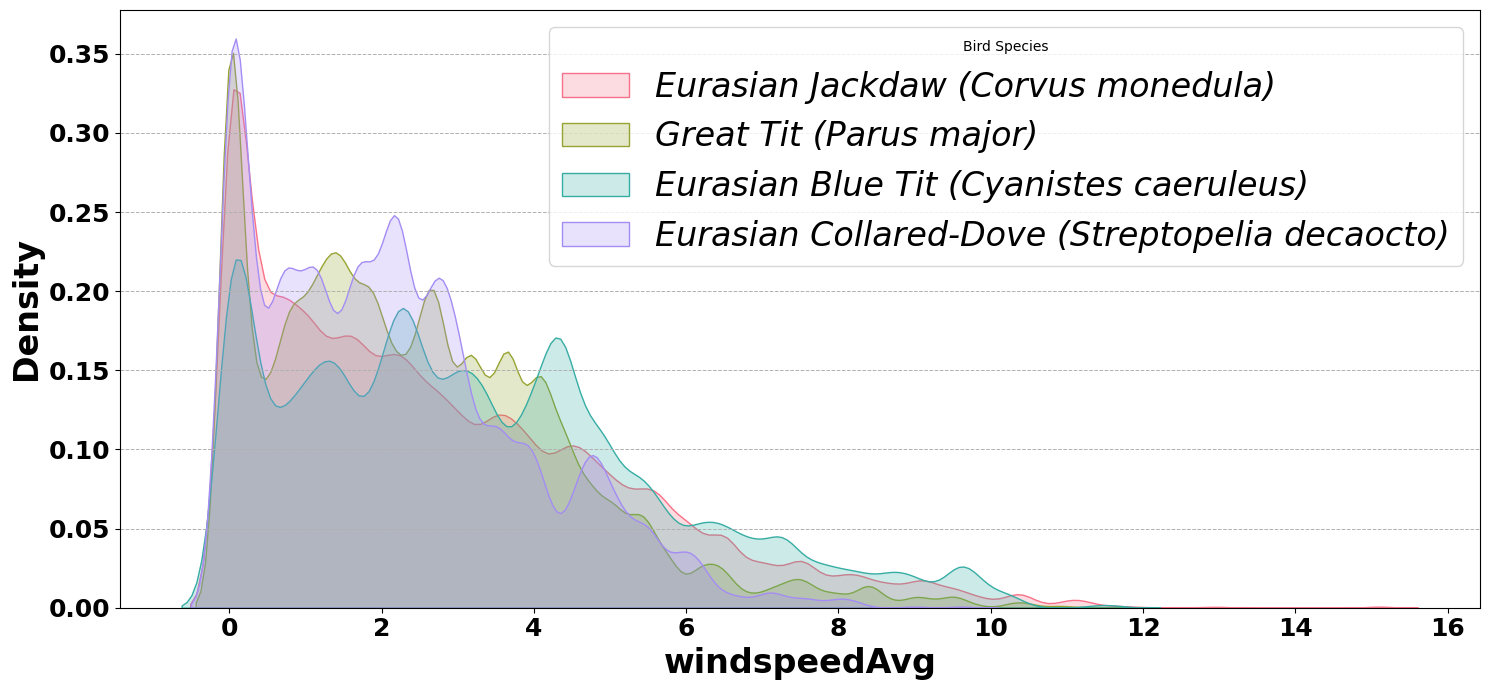

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

def kdeplot_bird_activity_by_feature(df, feature_column='windspeedAvg', most_common_species=None):
    # Ensure the wind_column is numeric
    df[feature_column] = pd.to_numeric(df[feature_column], errors='coerce')
    
    # Drop NaN values for the KDE plot
    wind_speeds = df[feature_column].dropna()
    
    # Create KDE plot
    plt.figure(figsize=(15, 7))
    
    # Prepare custom labels with common names and scientific names
    custom_labels = []
    for bird in most_common_species:
        common_name, scientific_name = bird.split('_')
        custom_label = f"{scientific_name} ({common_name})"
        custom_labels.append(custom_label)
    
    # Generate a color palette with a distinct color for each species
    colors = sns.color_palette('husl', len(most_common_species))
    
    # Create KDE plot for each species
    for idx, bird in enumerate(most_common_species):
        # Filter the DataFrame for the current species wind speed data
        species_wind_speeds = df[df['BirdNET'] == bird][feature_column].dropna()
        
        sns.kdeplot(species_wind_speeds, bw_adjust=0.5, fill=True, label=custom_labels[idx], color=colors[idx])
    
    # Customizing the plot
    plt.xlabel(feature_column, fontsize=24, fontweight='bold')
    plt.ylabel('Density', fontsize=24, fontweight='bold')
    plt.xticks(fontsize=18, fontweight='bold')
    plt.yticks(fontsize=18, fontweight='bold')  # Assuming you want y-ticks to be visible and styled
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    
    # Create the legend with custom labels
    plt.legend(title='Bird Species', loc='upper right', prop={'size': 24, 'style': 'italic'})
    
    plt.tight_layout()
    plt.show()

# Replace 'df' with your actual DataFrame variable name and 'most_common_species' with your actual bird species names.
kdeplot_bird_activity_by_feature(TP_df, feature_column='windspeedAvg', most_common_species=most_common_birds)


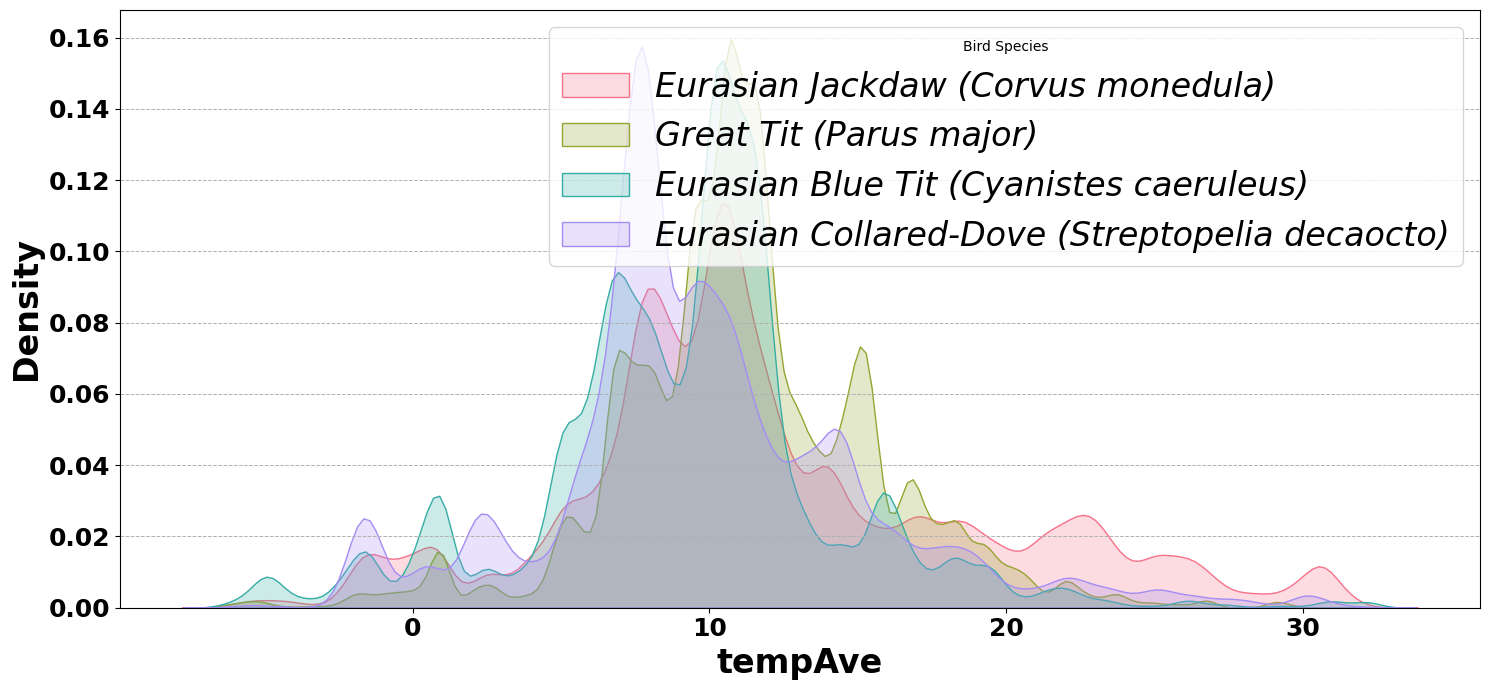

In [60]:
kdeplot_bird_activity_by_feature(TP_df, feature_column='tempAve', most_common_species=most_common_birds)


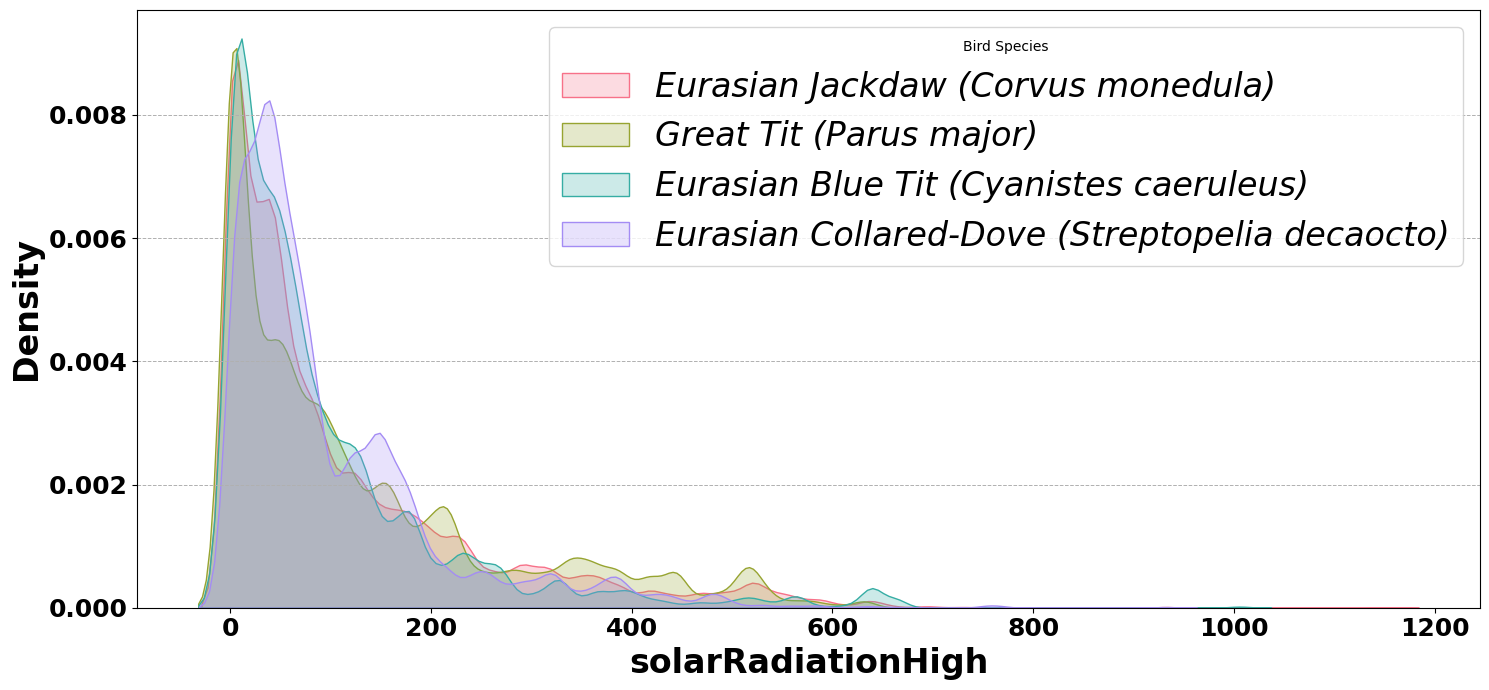

In [61]:
kdeplot_bird_activity_by_feature(TP_df, feature_column='solarRadiationHigh', most_common_species=most_common_birds)


In [62]:
import pandas as pd
import scipy.stats as stats

def filter_daytime_data(df):
    """
    Filters the DataFrame to include only the times between 4:00 AM and 10:00 PM.
    
    Parameters:
        df (pd.DataFrame): DataFrame with a datetime column.
    
    Returns:
        pd.DataFrame: DataFrame filtered to include only daytime data.
    """
    # Convert 'datetime' to datetime type and set as index if not already done
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df['datetime'] = pd.to_datetime(df['datetime'])
        df.set_index('datetime', inplace=True)

    # Filter to include only times from 4:00 AM to 10:00 PM
    return df.between_time('04:00', '22:00')



In [63]:
daytime_data = filter_daytime_data(full_data)# Filter the data to include only daytime hours
daytime_data.head()

,precipRate,pressureMax,dewptAvg,windgustHigh,windspeedAvg,tempAve,humidityAvg,winddirAvg,uvHigh,solarRadiationHigh,BirdNET,MIT_AST_label,sound_class_label
datetime,,,,,,,,,,,,,
2024-03-03 08:34:48,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,NaN,Bird,bird
2024-03-03 08:34:50,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Owl,bird
2024-03-03 08:34:53,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Owl,bird
2024-03-03 08:34:56,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Bird,bird
2024-03-03 08:34:59,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,NaN,Bird,bird


In [64]:
daytime_data.shape

(334779, 13)

In [10]:
import pandas as pd

def datetime_to_index(data):#  already done inside filter_daytime_data()
    """
    Ensure that the DataFrame uses 'datetime' as a datetime-indexed column.
    If 'datetime' is not the index, convert it and set it as the index.

    Parameters:
        data (pd.DataFrame): DataFrame containing a 'datetime' column.

    Returns:
        pd.DataFrame: DataFrame with 'datetime' as the datetime-index.
    """
    # Check if 'datetime' is already the index and if it is a datetime type
    if not (data.index.name == 'datetime' and pd.api.types.is_datetime64_any_dtype(data.index)):
        # Check if 'datetime' column exists and is not the index
        if 'datetime' in data.columns:
            # Convert 'datetime' column to datetime type if not already
            data['datetime'] = pd.to_datetime(data['datetime'])
            # Set 'datetime' column as the index
            data.set_index('datetime', inplace=True)
        else:
            raise ValueError("DataFrame does not contain a 'datetime' column.")
    return data


Let's try correclation analysis once more.
Why Use Point Biserial Correlation?
The choice of using point biserial correlation (pointbiserialr) is based on the nature of the variables involved:

Binary Dependent Variable: Bird_Detections is a binary variable (0/1).
Continuous Independent Variables: The other variables (e.g., precipRate, pressureMax) are continuous.
Point biserial correlation is specifically designed to measure the relationship between a binary variable and a continuous variable. It is essentially a special case of the Pearson correlation coefficient but adapted for a binary and a continuous variable.

McCrum-Gardner (2008) explains that the point-biserial correlation is appropriate when one variable is dichotomous (binary) and the other is continuous, making it ideal for scenarios like examining Bird_Detections (0/1) against continuous predictors such as precipRate and pressureMax.

Source: McCrum-Gardner, E. (2008). Which is the correct statistical test to use? British Journal of Oral and Maxillofacial Surgery, 46(1), 38-41.

Missing values in each column:
 precipRate                 0
pressureMax                0
dewptAvg                   0
windgustHigh               0
windspeedAvg               0
tempAve                    0
humidityAvg                0
winddirAvg                 0
uvHigh                     0
solarRadiationHigh         0
BirdNET               263472
MIT_AST_label          12706
sound_class_label      12706
Bird_Detections            0
dtype: int64
Summary statistics:
           precipRate    pressureMax       dewptAvg   windgustHigh  \
count  334779.000000  334779.000000  334779.000000  334779.000000   
mean        0.365677    1009.262285       8.729549      12.025609   
std         1.408744      11.773350       5.048462       7.695737   
min         0.000000     979.410000      -9.900000       0.000000   
25%         0.000000    1000.340000       6.500000       5.500000   
50%         0.000000    1010.740000       8.700000      11.100000   
75%         0.000000    1017.610000      10.8

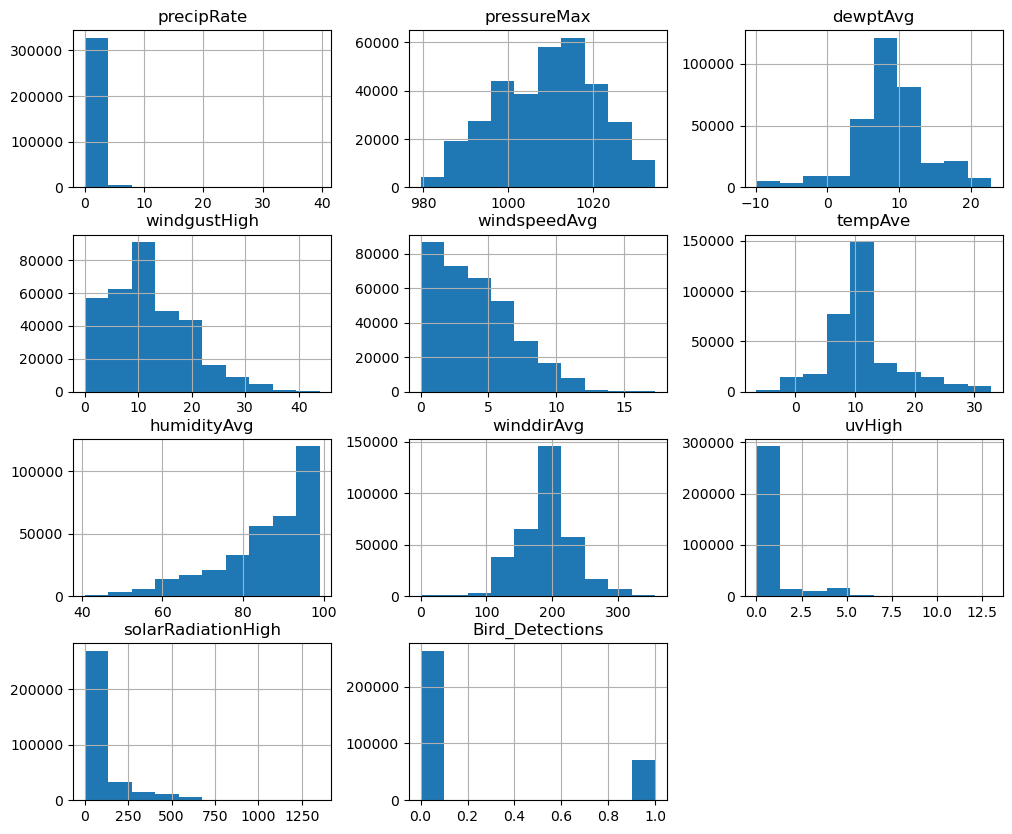

Correlation between Bird_Detections and precipRate: correlation coefficient = -0.08786942807111317, p-value = 0.0
Correlation between Bird_Detections and pressureMax: correlation coefficient = 0.11053881808116718, p-value = 0.0
Correlation between Bird_Detections and dewptAvg: correlation coefficient = -0.038560631210960164, p-value = 2.3930514215273908e-110
Correlation between Bird_Detections and windgustHigh: correlation coefficient = -0.21373728824428948, p-value = 0.0
Correlation between Bird_Detections and windspeedAvg: correlation coefficient = -0.2139962261601172, p-value = 0.0
Correlation between Bird_Detections and tempAve: correlation coefficient = -0.01248366755895318, p-value = 5.073503037780314e-13
Correlation between Bird_Detections and humidityAvg: correlation coefficient = -0.05626287568633838, p-value = 8.021370333497801e-233
Correlation between Bird_Detections and winddirAvg: correlation coefficient = -0.087893182924677, p-value = 0.0
Correlation between Bird_Detectio

/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_74866/3271054284.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_data['Bird_Detections'] = daytime_data['BirdNET'].notna().astype(int)
/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_74866/3271054284.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation', y='Variable', data=correlation_df, palette='coolwarm')


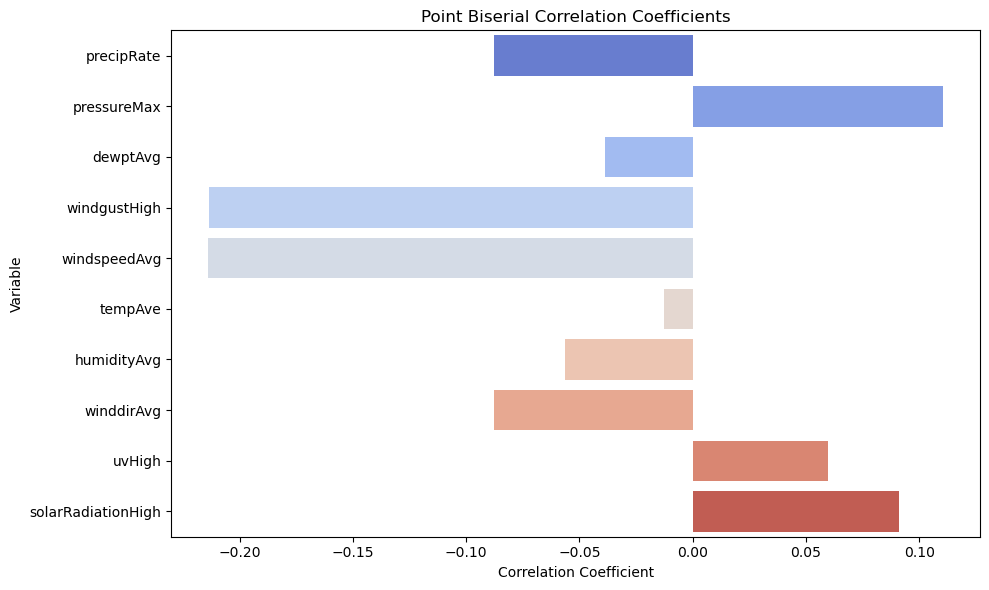

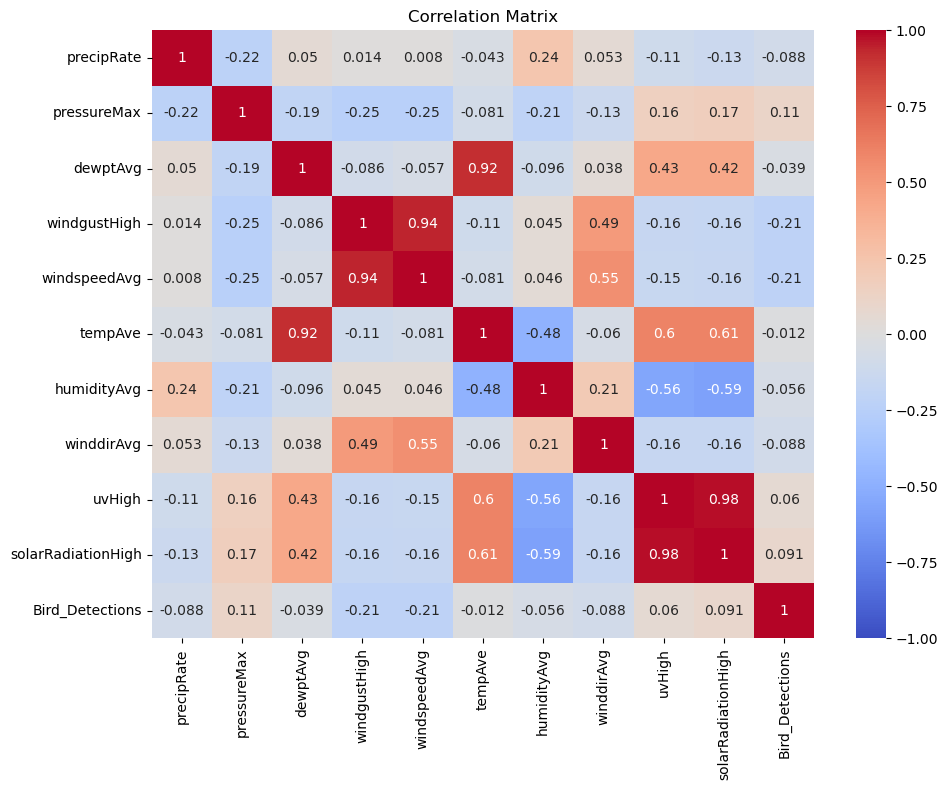

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

# Assuming daytime_data is already loaded

# Check for missing values
print("Missing values in each column:\n", daytime_data.isnull().sum())

# Summary statistics
print("Summary statistics:\n", daytime_data.describe())

# Histograms for all continuous variables
daytime_data.hist(figsize=(12, 10))
plt.show()

# Create a binary column for bird vocalizations detected
daytime_data['Bird_Detections'] = daytime_data['BirdNET'].notna().astype(int)

# Identify continuous variables (assuming non-binary numeric columns)
continuous_vars = daytime_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
continuous_vars.remove('Bird_Detections')  # Remove the binary column if it's included

# Point biserial correlation
correlations = []
for var in continuous_vars:
    corr, p_value = pointbiserialr(daytime_data['Bird_Detections'], daytime_data[var])
    correlations.append((var, corr))
    print(f"Correlation between Bird_Detections and {var}: correlation coefficient = {corr}, p-value = {p_value}")

# Create a DataFrame for correlation coefficients
correlation_df = pd.DataFrame(correlations, columns=['Variable', 'Correlation'])

# Plot the correlation coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Variable', data=correlation_df, palette='coolwarm')
plt.title('Point Biserial Correlation Coefficients')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

# Select only numeric columns for the Pearson correlation matrix
numeric_cols = daytime_data.select_dtypes(include=['number']).columns
corr_matrix = daytime_data[numeric_cols].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()




### Interpretation of Correlation Analysis Results

The correlation coefficients and p-values between `Bird_Detections` (binary) and each continuous variable are given below. Let's interpret these results step by step.

1. **Correlation Coefficient**: Measures the strength and direction of the linear relationship between the binary variable and the continuous variable.
   - Values range from -1 to 1.
   - Positive values indicate a positive relationship.
   - Negative values indicate a negative relationship.

2. **P-value**: Indicates the statistical significance of the correlation.
   - A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, suggesting that the correlation is statistically significant.

### Detailed Interpretation

#### 1. PrecipRate
- **Correlation Coefficient**: -0.0879
- **P-value**: 0.0
- **Interpretation**: There is a very weak negative correlation between `precipRate` and `Bird_Detections`. The relationship is statistically significant (p-value = 0.0), meaning as precipitation rate increases, bird detections slightly decrease.

#### 2. PressureMax
- **Correlation Coefficient**: 0.1105
- **P-value**: 0.0
- **Interpretation**: There is a very weak positive correlation between `pressureMax` and `Bird_Detections`. The relationship is statistically significant (p-value = 0.0), indicating that higher maximum pressure is slightly associated with more bird detections.

#### 3. DewptAvg
- **Correlation Coefficient**: -0.0386
- **P-value**: 2.39e-110
- **Interpretation**: There is a very weak negative correlation between `dewptAvg` and `Bird_Detections`. The relationship is statistically significant, suggesting a slight decrease in bird detections with higher average dew point.

#### 4. WindgustHigh
- **Correlation Coefficient**: -0.2137
- **P-value**: 0.0
- **Interpretation**: There is a weak negative correlation between `windgustHigh` and `Bird_Detections`. The relationship is statistically significant, indicating that higher wind gusts are associated with fewer bird detections.

#### 5. WindspeedAvg
- **Correlation Coefficient**: -0.2140
- **P-value**: 0.0
- **Interpretation**: There is a weak negative correlation between `windspeedAvg` and `Bird_Detections`. The relationship is statistically significant, meaning higher average wind speed is associated with fewer bird detections.

#### 6. TempAve
- **Correlation Coefficient**: -0.0125
- **P-value**: 5.07e-13
- **Interpretation**: There is a very weak negative correlation between `tempAve` and `Bird_Detections`. The relationship is statistically significant, suggesting a slight decrease in bird detections with higher average temperature.

#### 7. HumidityAvg
- **Correlation Coefficient**: -0.0563
- **P-value**: 8.02e-233
- **Interpretation**: There is a very weak negative correlation between `humidityAvg` and `Bird_Detections`. The relationship is statistically significant, indicating that higher average humidity is slightly associated with fewer bird detections.

#### 8. WinddirAvg
- **Correlation Coefficient**: -0.0879
- **P-value**: 0.0
- **Interpretation**: There is a very weak negative correlation between `winddirAvg` and `Bird_Detections`. The relationship is statistically significant, suggesting a slight decrease in bird detections with changes in average wind direction.

#### 9. UVHigh
- **Correlation Coefficient**: 0.0595
- **P-value**: 1.40e-260
- **Interpretation**: There is a very weak positive correlation between `uvHigh` and `Bird_Detections`. The relationship is statistically significant, indicating that higher UV index is slightly associated with more bird detections.

#### 10. SolarRadiationHigh
- **Correlation Coefficient**: 0.0908
- **P-value**: 0.0
- **Interpretation**: There is a very weak positive correlation between `solarRadiationHigh` and `Bird_Detections`. The relationship is statistically significant, suggesting that higher solar radiation is slightly associated with more bird detections.

### Summary
Overall, the correlations between `Bird_Detections` and the continuous variables are weak, with correlation coefficients close to zero. However, all relationships are statistically significant, likely due to the large sample size, as indicated by the extremely small p-values. 

**Key insights:**
- **Weak Negative Correlations**: `precipRate`, `dewptAvg`, `windgustHigh`, `windspeedAvg`, `tempAve`, `humidityAvg`, and `winddirAvg` all show weak negative correlations with bird detections, suggesting that certain weather conditions (e.g., higher wind speeds, higher humidity) are slightly associated with fewer bird detections.
- **Weak Positive Correlations**: `pressureMax`, `uvHigh`, and `solarRadiationHigh` show weak positive correlations, indicating that higher pressure, UV index, and solar radiation are slightly associated with more bird detections.

Although these correlations are weak, they provide valuable insights into how different environmental factors might influence bird detection rates.